In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import morton

In [7]:

#df = pd.read_csv ('../Data/Ausschnitte/Hard_Braking/braking_cut_8_brakes.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down'])

df = pd.read_csv ('./thesis_data/data/Vehicle-IMU-Acceleration-10Hz.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','IMULatAcceleration', 'IMULgtAcceleration', 'IMUVerAcceleration'])
#df = pd.read_csv ('../Data/database_rec_test_csv/opendlv.device.gps.pos.Grp1Data-0.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down'])
#df.rename(columns = {'timestamp:10881:<lon>':'ts', 'accel_lon:10881:<double>':'accel_lon', 'accel_trans:10881:<double>':'accel_trans', 'accel_down:10881:<double>':'accel_down'}, inplace = True)

In [8]:
df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

In [9]:
df

,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts
0,0.3655,0.0085,9.6390,1584853114144056
1,0.3060,0.0255,9.6135,1584853114244214
2,0.3145,0.0595,9.6390,1584853114343862
3,0.3485,0.0935,9.6390,1584853114444137
4,0.3995,0.0425,9.6815,1584853114544210
...,...,...,...,...
33933,0.0085,-0.0765,9.6815,1584856523117558
33934,-0.0085,-0.0935,9.7155,1584856523217344
33935,-0.0255,-0.0765,9.6645,1584856523317244
33936,-0.0255,-0.0935,9.6645,1584856523417580


<AxesSubplot: xlabel='lon'>

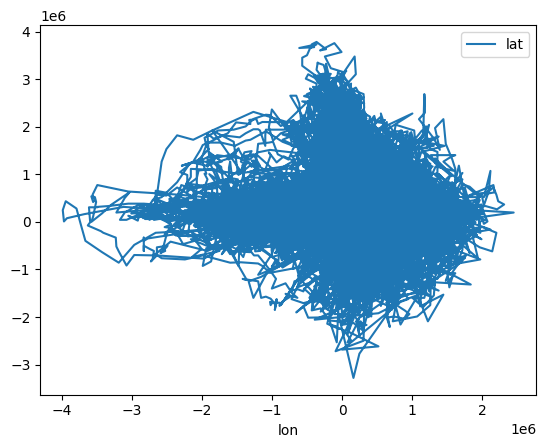

In [34]:
# faktor_multiply = 1000000; Don't know wat it is
faktor_multiply = 1000000
offset = 10

df['lon'] = df.apply(lambda x: int(x['IMULgtAcceleration']*faktor_multiply) , axis=1)
df['lat'] = df.apply(lambda x: int(x['IMULatAcceleration']*faktor_multiply) , axis=1)

df.plot(x = 'lon', y = 'lat')

In [35]:
df

,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,lon,lat
0,0.3655,0.0085,9.6390,1584853114144056,8500,365500
1,0.3060,0.0255,9.6135,1584853114244214,25500,306000
2,0.3145,0.0595,9.6390,1584853114343862,59500,314500
3,0.3485,0.0935,9.6390,1584853114444137,93500,348500
4,0.3995,0.0425,9.6815,1584853114544210,42500,399500
...,...,...,...,...,...,...
33933,0.0085,-0.0765,9.6815,1584856523117558,-76500,8500
33934,-0.0085,-0.0935,9.7155,1584856523217344,-93500,-8500
33935,-0.0255,-0.0765,9.6645,1584856523317244,-76500,-25500
33936,-0.0255,-0.0935,9.6645,1584856523417580,-93500,-25500


In [36]:
# offset = 10

# df['accel_lon'] = df['accel_lon'].add(offset)
# df['accel_trans'] = df['accel_trans'].add(offset)
# df['accel_down'] = df['accel_down'].add(offset)

# faktor_multiply = 10000

# df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*faktor_multiply) , axis=1)
# df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*faktor_multiply) , axis=1)
# df['accel_down'] = df.apply(lambda x: int(x['accel_down']*faktor_multiply) , axis=1)

In [37]:
df

,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,lon,lat
0,0.3655,0.0085,9.6390,1584853114144056,8500,365500
1,0.3060,0.0255,9.6135,1584853114244214,25500,306000
2,0.3145,0.0595,9.6390,1584853114343862,59500,314500
3,0.3485,0.0935,9.6390,1584853114444137,93500,348500
4,0.3995,0.0425,9.6815,1584853114544210,42500,399500
...,...,...,...,...,...,...
33933,0.0085,-0.0765,9.6815,1584856523117558,-76500,8500
33934,-0.0085,-0.0935,9.7155,1584856523217344,-93500,-8500
33935,-0.0255,-0.0765,9.6645,1584856523317244,-76500,-25500
33936,-0.0255,-0.0935,9.6645,1584856523417580,-93500,-25500


In [45]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):    
    return m.pack(int(row['lon']), int(row['lat']))


df['morton'] = df.apply(set_value, axis=1)

#don't know why this doesn't work

AttributeError: module 'morton' has no attribute 'Morton'

In [46]:
# don't know what these numbers are in ts. Maybe lane change or sth ...?

dff = df[(df['ts'] > 1646666719952825) & (df['ts'] < 1646666769952825)]
#dff = df[(df['ts'] > 1646666550000000) & (df['ts'] < 1646666570000000)]
# dff = df[(df['ts'] > 1646666563800000) & (df['ts'] < 1646666564800000)]

#dff = df[(df['accel_lon'] > 140000)]
#dff = df[(df['morton'] > 26776019010)]
#dff = df

<AxesSubplot: xlabel='lon'>

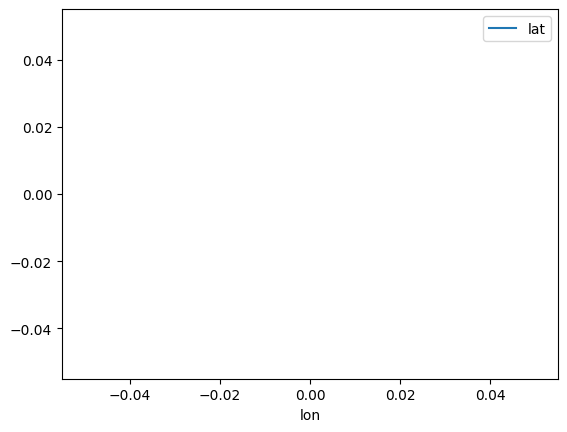

In [49]:
dff.plot(x = 'lon', y = 'lat')

<AxesSubplot:xlabel='ts'>

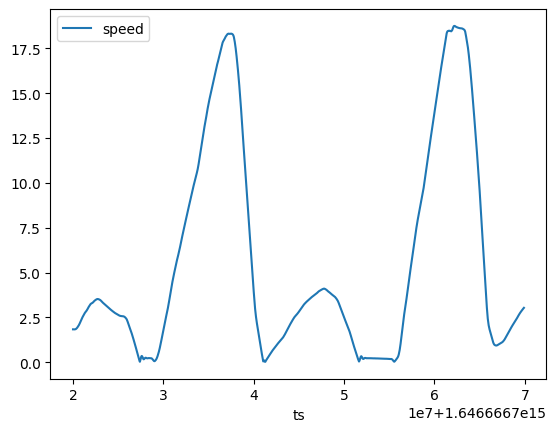

In [87]:
dff.plot(x = 'ts', y = 'speed')

<AxesSubplot: xlabel='ts'>

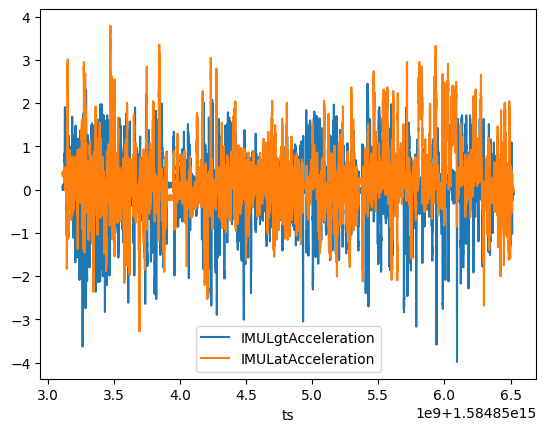

In [51]:
df.plot(x = 'ts', y=['IMULgtAcceleration', 'IMULatAcceleration'] )

<AxesSubplot: xlabel='IMULgtAcceleration', ylabel='IMULatAcceleration'>

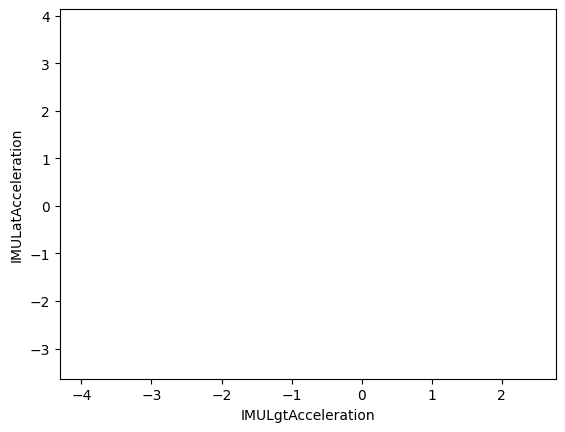

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

df.plot(kind='scatter',x='IMULgtAcceleration',y='IMULatAcceleration', color = dff['ts'], ax=ax)

In [56]:
df

,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,lon,lat
0,0.3655,0.0085,9.6390,1584853114144056,8500,365500
1,0.3060,0.0255,9.6135,1584853114244214,25500,306000
2,0.3145,0.0595,9.6390,1584853114343862,59500,314500
3,0.3485,0.0935,9.6390,1584853114444137,93500,348500
4,0.3995,0.0425,9.6815,1584853114544210,42500,399500
...,...,...,...,...,...,...
33933,0.0085,-0.0765,9.6815,1584856523117558,-76500,8500
33934,-0.0085,-0.0935,9.7155,1584856523217344,-93500,-8500
33935,-0.0255,-0.0765,9.6645,1584856523317244,-76500,-25500
33936,-0.0255,-0.0935,9.6645,1584856523417580,-93500,-25500


In [91]:
#m = morton.Morton(dimensions=2, bits=30)

#dff['accel_lon']

#m.pack(int(dff['accel_lon']), int(dff['accel_trans']))

In [92]:
dff

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts,morton
3399,57718782,11958487,1.832739,99752,101871,101567,1646666720001146,16117918954
3400,57718782,11958488,1.831790,100259,100582,97771,1646666720051097,16115952685
3401,57718782,11958490,1.830584,99527,100603,99410,1646666720101091,16115628703
3402,57718781,11958491,1.829160,99976,99253,97138,1646666720151115,16108145250
3403,57718781,11958493,1.831100,98739,99200,99653,1646666720201104,16106898693
...,...,...,...,...,...,...,...,...
4393,57718744,11958596,2.909300,97399,83118,100965,1646666769702749,13781474749
4394,57718743,11958597,2.942660,98903,82833,101251,1646666769752738,14496469783
4395,57718742,11958597,2.974508,97993,83937,98317,1646666769802735,13782415427
4396,57718741,11958598,3.004279,99453,82004,100093,1646666769852804,14496577393


Diagramm incomming...


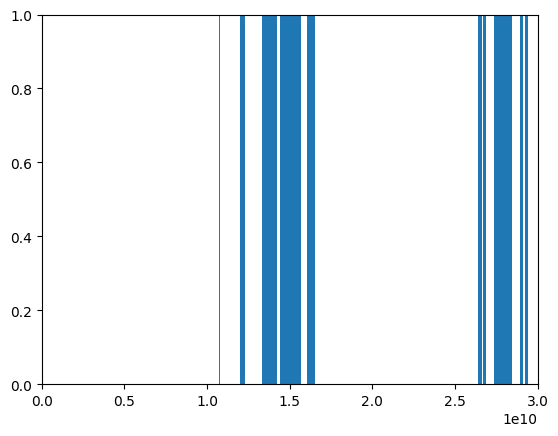

In [93]:
min = dff['morton'].min()
max = dff['morton'].max()
max = 30000000000

print("Diagramm incomming...")

plt.hist(dff['morton'], bins=200)
plt.xlim(0,max)
plt.ylim(0,1)
plt.show()

In [94]:
dff.to_csv(r'../Data/Ausschnitte/Hard_Braking/Braking_eine_runde.csv', sep=';', index = False)